In [1]:
## Importing Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score,recall_score,f1_score,classification_report, confusion_matrix
from scipy.linalg import pinv2
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [3]:
df = pd.read_csv('C:\\Users\\YMTS0519\\Documents\\Disease Gene\\dataset\\data.tsv',sep='\t')

In [4]:
df.head()

,geneId,geneSymbol,DSI,DPI,diseaseId,diseaseName,diseaseType,diseaseClass,diseaseSemanticType,score,EI,YearInitial,YearFinal,NofPmids,NofSnps,source
0,1,A1BG,0.7,0.538,C0001418,Adenocarcinoma,group,C04,Neoplastic Process,0.01,1.0,2008.0,2008.0,1,0,LHGDN
1,1,A1BG,0.7,0.538,C0002736,Amyotrophic Lateral Sclerosis,disease,C18;C10,Disease or Syndrome,0.01,1.0,2008.0,2008.0,1,0,BEFREE
2,1,A1BG,0.7,0.538,C0003578,Apnea,phenotype,C23;C08,Sign or Symptom,0.01,1.0,2017.0,2017.0,1,0,BEFREE
3,1,A1BG,0.7,0.538,C0003864,Arthritis,disease,C05,Disease or Syndrome,0.01,1.0,2019.0,2019.0,1,0,BEFREE
4,1,A1BG,0.7,0.538,C0008373,Cholesteatoma,disease,C17,Disease or Syndrome,0.01,1.0,2020.0,2020.0,1,0,BEFREE


In [5]:
df['diseaseType'].unique()

array(['group', 'disease', 'phenotype'], dtype=object)

In [6]:
df['diseaseType'].value_counts()

disease      781622
phenotype    211293
group        142027
Name: diseaseType, dtype: int64

In [7]:
df.shape

(1134942, 16)

In [8]:
len(df.diseaseName.value_counts())

30170

In [9]:
df.isnull().sum()

geneId                      0
geneSymbol                  0
DSI                      2584
DPI                      2882
diseaseId                   0
diseaseName                 0
diseaseType                 0
diseaseClass           156403
diseaseSemanticType         0
score                       0
EI                     166974
YearInitial            166974
YearFinal              166974
NofPmids                    0
NofSnps                     0
source                      0
dtype: int64

In [10]:
## seperating Numerical Variables from the dataset.
num_var = df.select_dtypes(exclude='object')

In [11]:
num_var

,geneId,DSI,DPI,score,EI,YearInitial,YearFinal,NofPmids,NofSnps
0,1,0.700,0.538,0.01,1.0,2008.0,2008.0,1,0
1,1,0.700,0.538,0.01,1.0,2008.0,2008.0,1,0
2,1,0.700,0.538,0.01,1.0,2017.0,2017.0,1,0
3,1,0.700,0.538,0.01,1.0,2019.0,2019.0,1,0
4,1,0.700,0.538,0.01,1.0,2020.0,2020.0,1,0
...,...,...,...,...,...,...,...,...,...
1134937,115804232,NaN,NaN,0.10,1.0,2019.0,2019.0,1,0
1134938,115891964,0.861,0.077,0.01,1.0,2016.0,2016.0,1,0
1134939,115891964,0.861,0.077,0.01,1.0,2016.0,2016.0,1,0
1134940,115891964,0.861,0.077,0.01,1.0,2016.0,2016.0,1,0


In [12]:
df.DSI.median()

0.534

In [13]:
df.DSI.mean()

0.5416682056381463

In [14]:
df.describe()

,geneId,DSI,DPI,score,EI,YearInitial,YearFinal,NofPmids,NofSnps
count,1.134942e+06,1.132358e+06,1.132060e+06,1.134942e+06,967968.000000,967968.000000,967968.000000,1.134942e+06,1.134942e+06
mean,2.437042e+06,5.416682e-01,6.979658e-01,6.318843e-02,0.975242,2011.138019,2013.941110,2.632643e+00,2.407973e-01
std,1.553331e+07,1.300706e-01,2.029981e-01,9.900556e-02,0.136500,7.649745,6.370832,1.949824e+01,5.058252e+00
min,1.000000e+00,2.310000e-01,3.800000e-02,1.000000e-02,0.000000,1924.000000,1959.000000,0.000000e+00,0.000000e+00
25%,3.169000e+03,4.520000e-01,6.150000e-01,1.000000e-02,1.000000,2007.000000,2011.000000,1.000000e+00,0.000000e+00
50%,6.580000e+03,5.340000e-01,7.690000e-01,2.000000e-02,1.000000,2013.000000,2017.000000,1.000000e+00,0.000000e+00
75%,2.734200e+04,6.210000e-01,8.460000e-01,1.000000e-01,1.000000,2017.000000,2019.000000,2.000000e+00,0.000000e+00
max,1.158920e+08,1.000000e+00,9.620000e-01,1.000000e+00,1.000000,2020.000000,2020.000000,6.577000e+03,2.632000e+03


In [15]:
df.DPI.median()

0.769

In [16]:
df.DPI.mean()

0.6979657933325094

In [17]:
num_var.fillna(num_var.median(),inplace = True)

c:\program files\python36\lib\site-packages\pandas\core\series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [18]:
num_var.isnull().sum()

geneId         0
DSI            0
DPI            0
score          0
EI             0
YearInitial    0
YearFinal      0
NofPmids       0
NofSnps        0
dtype: int64

In [19]:
## Sepearting Categorical Variables from the dataset.
cat_var = df.select_dtypes(include='object')

In [20]:
cat_var.head()

,geneSymbol,diseaseId,diseaseName,diseaseType,diseaseClass,diseaseSemanticType,source
0,A1BG,C0001418,Adenocarcinoma,group,C04,Neoplastic Process,LHGDN
1,A1BG,C0002736,Amyotrophic Lateral Sclerosis,disease,C18;C10,Disease or Syndrome,BEFREE
2,A1BG,C0003578,Apnea,phenotype,C23;C08,Sign or Symptom,BEFREE
3,A1BG,C0003864,Arthritis,disease,C05,Disease or Syndrome,BEFREE
4,A1BG,C0008373,Cholesteatoma,disease,C17,Disease or Syndrome,BEFREE


In [21]:
cat_var.isnull().sum()

geneSymbol                  0
diseaseId                   0
diseaseName                 0
diseaseType                 0
diseaseClass           156403
diseaseSemanticType         0
source                      0
dtype: int64

In [22]:
df.diseaseClass.mode()

0    C04
dtype: object

In [23]:
## Handling missing categorical variuables
cat_var = cat_var.apply(lambda x: x.fillna(x.value_counts().index[0]))

In [24]:
cat_var.isnull().sum()

geneSymbol             0
diseaseId              0
diseaseName            0
diseaseType            0
diseaseClass           0
diseaseSemanticType    0
source                 0
dtype: int64

In [25]:
cat_var.head()

,geneSymbol,diseaseId,diseaseName,diseaseType,diseaseClass,diseaseSemanticType,source
0,A1BG,C0001418,Adenocarcinoma,group,C04,Neoplastic Process,LHGDN
1,A1BG,C0002736,Amyotrophic Lateral Sclerosis,disease,C18;C10,Disease or Syndrome,BEFREE
2,A1BG,C0003578,Apnea,phenotype,C23;C08,Sign or Symptom,BEFREE
3,A1BG,C0003864,Arthritis,disease,C05,Disease or Syndrome,BEFREE
4,A1BG,C0008373,Cholesteatoma,disease,C17,Disease or Syndrome,BEFREE


In [26]:
cat_var.geneSymbol.value_counts()

TNF          2724
TP53         2494
IL6          2367
VEGFA        1899
IL1B         1801
             ... 
LINC01695       1
TBC1D21         1
HNRNPKP3        1
LINC00575       1
OR8A1           1
Name: geneSymbol, Length: 21666, dtype: int64

In [27]:
cat_var.head(2)

,geneSymbol,diseaseId,diseaseName,diseaseType,diseaseClass,diseaseSemanticType,source
0,A1BG,C0001418,Adenocarcinoma,group,C04,Neoplastic Process,LHGDN
1,A1BG,C0002736,Amyotrophic Lateral Sclerosis,disease,C18;C10,Disease or Syndrome,BEFREE


In [28]:
len(cat_var.diseaseName.value_counts())

30170

In [29]:
cat_var.diseaseType.value_counts()

disease      781622
phenotype    211293
group        142027
Name: diseaseType, dtype: int64

In [30]:
len(cat_var.diseaseSemanticType.value_counts())

33

In [31]:
cat_var.source.value_counts()

BEFREE                                 789377
HPO                                    148643
CTD_human                               44786
GWASCAT                                 34270
CLINVAR                                 14326
                                        ...  
GENOMICS_ENGLAND;MGD;UNIPROT                1
GENOMICS_ENGLAND;RGD                        1
BEFREE;GWASCAT;HPO;LHGDN;PSYGENET           1
BEFREE;CLINVAR;GWASCAT;HPO;ORPHANET         1
BEFREE;CLINVAR;CTD_mouse                    1
Name: source, Length: 878, dtype: int64

In [32]:
cat_var.diseaseClass.value_counts()

C04                                    289130
C06;C04                                 50706
C14                                     33452
C23                                     32747
C23;C10                                 28039
                                        ...  
C23;C16;C13;C05;C12;C10;F03;C07;F01         1
C16;C18;C05;F03                             1
C01;C12;C08                                 1
C11;C05;C10;C14                             1
C23;C08;C10;F03;C09                         1
Name: diseaseClass, Length: 1106, dtype: int64

In [33]:
le = LabelEncoder()
cat_var1 = cat_var.apply(le.fit_transform)

In [34]:
cat_var.head(3)

,geneSymbol,diseaseId,diseaseName,diseaseType,diseaseClass,diseaseSemanticType,source
0,A1BG,C0001418,Adenocarcinoma,group,C04,Neoplastic Process,LHGDN
1,A1BG,C0002736,Amyotrophic Lateral Sclerosis,disease,C18;C10,Disease or Syndrome,BEFREE
2,A1BG,C0003578,Apnea,phenotype,C23;C08,Sign or Symptom,BEFREE


In [35]:
cat_var1.head(3)

,geneSymbol,diseaseId,diseaseName,diseaseType,diseaseClass,diseaseSemanticType,source
0,0,52,1855,1,49,23,859
1,0,134,2533,0,613,11,0
2,0,222,3074,2,740,30,0


In [36]:
## 0 == disease
## 1 == group
## 2 == Phenotype
# cat_var.diseaseType.value_counts()
# cat_var1['diseaseType'] = df.diseaseType
cat_var1.head()

,geneSymbol,diseaseId,diseaseName,diseaseType,diseaseClass,diseaseSemanticType,source
0,0,52,1855,1,49,23,859
1,0,134,2533,0,613,11,0
2,0,222,3074,2,740,30,0
3,0,244,3209,0,127,11,0
4,0,565,6371,0,572,11,0


In [37]:
## Merging Categorical and numerical variables after Data Preprocessing.

data = pd.concat([num_var,cat_var1],axis = 1)


In [38]:
data.head()

,geneId,DSI,DPI,score,EI,YearInitial,YearFinal,NofPmids,NofSnps,geneSymbol,diseaseId,diseaseName,diseaseType,diseaseClass,diseaseSemanticType,source
0,1,0.7,0.538,0.01,1.0,2008.0,2008.0,1,0,0,52,1855,1,49,23,859
1,1,0.7,0.538,0.01,1.0,2008.0,2008.0,1,0,0,134,2533,0,613,11,0
2,1,0.7,0.538,0.01,1.0,2017.0,2017.0,1,0,0,222,3074,2,740,30,0
3,1,0.7,0.538,0.01,1.0,2019.0,2019.0,1,0,0,244,3209,0,127,11,0
4,1,0.7,0.538,0.01,1.0,2020.0,2020.0,1,0,0,565,6371,0,572,11,0


In [39]:
data[data['diseaseType']==2]

,geneId,DSI,DPI,score,EI,YearInitial,YearFinal,NofPmids,NofSnps,geneSymbol,diseaseId,diseaseName,diseaseType,diseaseClass,diseaseSemanticType,source
2,1,0.700,0.538,0.01,1.0,2017.0,2017.0,1,0,0,222,3074,2,740,30,0
8,1,0.700,0.538,0.01,1.0,2017.0,2017.0,1,0,0,1016,10752,2,572,30,0
9,1,0.700,0.538,0.01,1.0,2018.0,2018.0,1,0,0,1099,29976,2,654,2,0
11,1,0.700,0.538,0.30,1.0,2017.0,2017.0,1,0,0,1368,13314,2,716,15,762
55,2,0.529,0.769,0.20,1.0,1988.0,1988.0,1,0,3,1080,11387,2,654,30,876
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1134889,115482723,0.506,0.846,0.01,1.0,2017.0,2017.0,1,0,7178,12422,10329,2,49,11,0
1134895,115482723,0.506,0.846,0.07,1.0,2008.0,2018.0,7,0,7178,13468,28471,2,49,23,0
1134908,115482723,0.506,0.846,0.01,1.0,2016.0,2016.0,1,0,7178,15147,18117,2,49,23,0
1134923,115482723,0.506,0.846,0.01,1.0,2004.0,2004.0,1,0,7178,22616,23366,2,654,30,0


In [40]:
data.shape

(1134942, 16)

In [41]:
data.isnull().sum()

geneId                 0
DSI                    0
DPI                    0
score                  0
EI                     0
YearInitial            0
YearFinal              0
NofPmids               0
NofSnps                0
geneSymbol             0
diseaseId              0
diseaseName            0
diseaseType            0
diseaseClass           0
diseaseSemanticType    0
source                 0
dtype: int64

In [42]:
X = data.drop(['diseaseType','NofSnps','EI'],axis = 1)
X.head()

,geneId,DSI,DPI,score,YearInitial,YearFinal,NofPmids,geneSymbol,diseaseId,diseaseName,diseaseClass,diseaseSemanticType,source
0,1,0.7,0.538,0.01,2008.0,2008.0,1,0,52,1855,49,23,859
1,1,0.7,0.538,0.01,2008.0,2008.0,1,0,134,2533,613,11,0
2,1,0.7,0.538,0.01,2017.0,2017.0,1,0,222,3074,740,30,0
3,1,0.7,0.538,0.01,2019.0,2019.0,1,0,244,3209,127,11,0
4,1,0.7,0.538,0.01,2020.0,2020.0,1,0,565,6371,572,11,0


In [43]:
y = data.diseaseType

In [44]:
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

In [45]:
X_res.shape, y_res.shape

((2344866, 13), (2344866,))

In [46]:
## Splitting the dataset into Training and Testing foir further use.
x_train,x_test,y_train,y_test = train_test_split(X_res,y_res,test_size = 0.3,random_state = 23)

### Random Forest Classifier


In [47]:

cfr = RandomForestClassifier()

In [48]:
model = cfr.fit(x_train,y_train)

In [49]:
pred = model.predict(x_test)

In [50]:
model.predict(x_test)

array([1, 2, 2, ..., 1, 1, 1])

In [51]:
X[:3]

,geneId,DSI,DPI,score,YearInitial,YearFinal,NofPmids,geneSymbol,diseaseId,diseaseName,diseaseClass,diseaseSemanticType,source
0,1,0.7,0.538,0.01,2008.0,2008.0,1,0,52,1855,49,23,859
1,1,0.7,0.538,0.01,2008.0,2008.0,1,0,134,2533,613,11,0
2,1,0.7,0.538,0.01,2017.0,2017.0,1,0,222,3074,740,30,0


In [52]:
model.score(x_test,y_test)

0.9883575469820601

In [53]:
accuracy_score(y_test,pred)

0.9883575469820601

In [55]:
cm = confusion_matrix(y_test,pred)
cm

array([[233047,    579,    447],
       [  2535, 230882,   1131],
       [  1811,   1687, 231341]], dtype=int64)

In [57]:
clsr= classification_report(y_test,pred)
print(clsr)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99    234073
           1       0.99      0.98      0.99    234548
           2       0.99      0.99      0.99    234839

    accuracy                           0.99    703460
   macro avg       0.99      0.99      0.99    703460
weighted avg       0.99      0.99      0.99    703460



<AxesSubplot:>

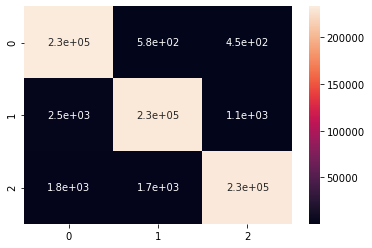

In [58]:
sns.heatmap(cm, annot=True)

In [ ]:
precision_score(y_test,pred,average = 'weighted')

In [ ]:
recall_score(y_test,pred,average = 'micro')

In [ ]:
f1_score(y_test,pred,average ='weighted')

In [ ]:
fpr,tpr,t = roc_curve(y_true = y_test,y_score = pred,pos_label =2)

In [ ]:
print(fpr,tpr,t)

In [ ]:
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],'--')
plt.scatter(fpr,tpr)
plt.title('ROC CURVE')
plt.xlabel('False Positive Rate',color = 'black')
plt.ylabel('True Positive Rate',color = 'black')
plt.show()

In [ ]:
model.feature_importances_

In [ ]:
fi = pd.DataFrame(model.feature_importances_, index= x_train.columns,columns=['importance']).sort_values('importance',ascending=False)

In [ ]:
feature_importances = pd.DataFrame(model.feature_importances_, index =x_train.columns,  columns=['importance']).sort_values('importance', ascending=False)

In [ ]:
fi

In [ ]:
accuracy_score(y_test,pred)

In [ ]:
sns.heatmap(confusion_matrix(y_test,pred),annot= True)

In [ ]:
# type(x_train),type(y_train)

In [ ]:
# (x_train[0][1])

### Extreme Gradient Boosting (XGBoost) Classifier

In [ ]:
import xgboost as xgb

In [ ]:
xgc = xgb.XGBClassifier()

In [ ]:
model1 = xgc.fit(x_train,y_train)

In [ ]:
pred = model1.predict(x_test)

In [ ]:
accuracy_score(y_test,pred)

In [ ]:
precision_score(y_test,pred,average = 'macro')

In [ ]:
recall_score(y_test,pred,average = 'weighted')

In [ ]:
f1_score(y_test,pred,average='micro')

In [ ]:
sns.heatmap(confusion_matrix(y_test,pred),annot = True)

In [ ]:
fpr,tpr,t = roc_curve(y_true = y_test,y_score = pred,pos_label =2)

In [ ]:
print(fpr,tpr,t)

In [ ]:
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],'--')
plt.scatter(fpr,tpr)
plt.title('ROC CURVE')
plt.xlabel('False Positive Rate',color = 'black')
plt.ylabel('True Positive Rate',color = 'black')
plt.show()

In [ ]:
roc_auc_score(y_test,pred,multi_class = 'ovo')

### Light Gradient Boosting Machine

In [ ]:
import lightgbm as lgb

In [ ]:
lgb1 = lgb.LGBMClassifier()

In [ ]:
model2 = lgb1.fit(x_train,y_train)

In [ ]:
pred2 = model2.predict(x_test)

In [ ]:
print(classification_report(y_test,pred2))

In [ ]:
accuracy_score(y_test,pred2)

In [ ]:
precision_score(y_test,pred2,average = 'macro')

In [ ]:
recall_score(y_test,pred2,average = 'weighted')

In [ ]:
confusion_matrix(y_test,pred2)

In [ ]:
sns.heatmap(confusion_matrix(y_test,pred2),annot = True)

In [ ]:
fpr,tpr,t = roc_curve(y_true = y_test,y_score = pred2,pos_label =2)

print(fpr,tpr,t)

plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],'--')
plt.scatter(fpr,tpr)
plt.title('ROC CURVE')
plt.xlabel('False Positive Rate',color = 'black')
plt.ylabel('True Positive Rate',color = 'black')
plt.show()

### K Nearest Neighbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
model3 = KNeighborsClassifier()

In [ ]:
model3.fit(x_train,y_train)

In [ ]:
pred3 = model3.predict(x_test)

In [ ]:
accuracy_score(y_test,pred3)

In [ ]:
model3.score(x_train,y_train)

In [ ]:
precision_score(y_test,pred3,average = 'macro')

In [ ]:
recall_score(y_test,pred3,average = 'micro')

In [ ]:
f1_score(y_test,pred3,average = 'weighted')

In [ ]:
print(classification_report(y_test,pred3))

In [ ]:
confusion_matrix(y_test,pred3)

In [ ]:
sns.heatmap(confusion_matrix(y_test,pred3),annot = True)

In [ ]:
fpr,tpr,t = roc_curve(y_true = y_test,y_score = pred3,pos_label =2)

print(fpr,tpr,t)

plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],'--')
plt.scatter(fpr,tpr)
plt.title('ROC CURVE')
plt.xlabel('False Positive Rate',color = 'black')
plt.ylabel('True Positive Rate',color = 'black')
plt.show()

### Support Vector machines

In [ ]:
model4 = SVC()

In [ ]:
model4.fit(x_train[:10000],y_train[:10000])


In [ ]:
pred4 = model4.predict(x_test)

In [ ]:
accuracy_score(y_test,pred4)

In [ ]:
precision_score(y_test,pred4,average = 'micro')

In [ ]:
recall_score(y_test,pred4,average = 'micro')

In [ ]:
f1_score(y_test,pred4,average = 'weighted')

In [ ]:
sns.heatmap(confusion_matrix(y_test,pred4),annot = True)

In [ ]:
fpr,tpr,t = roc_curve(y_true = y_test,y_score = pred4,pos_label =2)

print(fpr,tpr,t)

plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],'--')
plt.scatter(fpr,tpr)
plt.title('ROC CURVE')
plt.xlabel('False Positive Rate',color = 'black')
plt.ylabel('True Positive Rate',color = 'black')
plt.show()

### Predictions

In [ ]:
ex = [[1,0.7,0.538,0.01,2008.0,2008.0,1,0,52,1855,49,23,85]]

In [ ]:
model.predict(ex)

In [ ]:
val = pd.DataFrame(ex,columns= X.columns)
val

In [ ]:
model1.predict(val)

In [ ]:
model2.predict(ex)

In [ ]:
ex1 = [[1,0.7,0.538,0.01,2008.0,2008.0,1,0,52,1855,49,3,859]]

In [ ]:
model2.predict(ex1)

In [ ]:
val1 = pd.DataFrame(ex,columns = X.columns)

In [ ]:
model1.predict(val1)

In [ ]:
model.predict(ex1)

In [ ]:
x_test[10:20]

In [ ]:
y_test[10:20]

In [ ]:
p = [[6524,0.499,0.769,0.01,2018.0,2018.0,1,17605,464,20458,73,23,0]]

In [ ]:
model.predict(p)

In [ ]:
p1 = [[4038,0.568,0.692,0.10,2013.0,2017.0,0,10315,5467,27685,49,15,850]]

In [ ]:
model.predict(p1)

In [ ]:
p3 = [[6558,0.552,0.808,0.03,2010.0,2019.0,3,17303,2898,6027,212,11,0]]

In [ ]:
model.predict(p3)